In [1]:
library('tidyr')
library('tidyverse')
library('ggplot2')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ dplyr   1.1.0
✔ tibble  3.2.1     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [324]:
un1 = read.csv('unnormalised.csv')
summary(un1)

       X         Eccentricity     Insolation.Flux..Earth.Flux.
 Min.   :  30   Min.   :0.00000   Min.   :    0.02            
 1st Qu.:2344   1st Qu.:0.00000   1st Qu.:   26.21            
 Median :3208   Median :0.00000   Median :  104.85            
 Mean   :3150   Mean   :0.02658   Mean   :  425.56            
 3rd Qu.:4086   3rd Qu.:0.00000   3rd Qu.:  390.73            
 Max.   :5300   Max.   :0.92350   Max.   :44900.00            
 Equilibrium.Temperature..K. Stellar.Effective.Temperature..K.
 Min.   :  96.0              Min.   : 2566                    
 1st Qu.: 576.8              1st Qu.: 5145                    
 Median : 819.0              Median : 5638                    
 Mean   : 908.9              Mean   : 5474                    
 3rd Qu.:1143.0              3rd Qu.: 5954                    
 Max.   :4050.0              Max.   :10170                    
 Stellar.Radius..Solar.Radius. Stellar.Mass..Solar.mass.
 Min.   :0.12                  Min.   :0.090            
 1st

In [325]:
summary(un1)

       X         Eccentricity     Insolation.Flux..Earth.Flux.
 Min.   :  30   Min.   :0.00000   Min.   :    0.02            
 1st Qu.:2344   1st Qu.:0.00000   1st Qu.:   26.21            
 Median :3208   Median :0.00000   Median :  104.85            
 Mean   :3150   Mean   :0.02658   Mean   :  425.56            
 3rd Qu.:4086   3rd Qu.:0.00000   3rd Qu.:  390.73            
 Max.   :5300   Max.   :0.92350   Max.   :44900.00            
 Equilibrium.Temperature..K. Stellar.Effective.Temperature..K.
 Min.   :  96.0              Min.   : 2566                    
 1st Qu.: 576.8              1st Qu.: 5145                    
 Median : 819.0              Median : 5638                    
 Mean   : 908.9              Mean   : 5474                    
 3rd Qu.:1143.0              3rd Qu.: 5954                    
 Max.   :4050.0              Max.   :10170                    
 Stellar.Radius..Solar.Radius. Stellar.Mass..Solar.mass.
 Min.   :0.12                  Min.   :0.090            
 1st

In [326]:
names(un)

[1] "Eccentricity"                            
 [2] "Insolation.Flux..Earth.Flux."            
 [3] "Equilibrium.Temperature..K."             
 [4] "Stellar.Effective.Temperature..K."       
 [5] "Stellar.Radius..Solar.Radius."           
 [6] "Stellar.Mass..Solar.mass."               
 [7] "Stellar.Metallicity..dex."               
 [8] "Stellar.Surface.Gravity..log10.cm.s..2.."
 [9] "Distance..pc."                           
[10] "V..Johnson..Magnitude"                   
[11] "Ks..2MASS..Magnitude"                    
[12] "Gaia.Magnitude"                          
[13] "Planet.Radius..Earth.Radius."

In [327]:
un1 <- un1[ -c(1) ]

In [328]:
set.seed(1771) #set the random number generator seed.
n = floor(0.8 * nrow(un1)) #find the number corresponding to 80% of the data
index = sample(seq_len(nrow(un1)), size = n) #randomly sample indicies to be included in the training set

un = un1[index, ] #set the training set to be the randomly sampled rows of the dataframe
test = un1[-index, ] #set the testing set to be the remaining rows
dim(test) #check the dimensions
dim(un) #check the dimensions

[1] 673  13

[1] 2691   13

In [329]:
library(mgcv)

In [330]:
lm_1 <- lm( Planet.Radius..Earth.Radius. ~ . , data = un)
summary(lm_1)


Call:
lm(formula = Planet.Radius..Earth.Radius. ~ ., data = un)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.1724  -2.1273  -0.5029   1.1473  16.6205 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                              -4.431e+00  5.607e+00  -0.790  0.42943
Eccentricity                              8.297e+00  8.917e-01   9.304  < 2e-16
Insolation.Flux..Earth.Flux.             -2.172e-05  7.407e-05  -0.293  0.76940
Equilibrium.Temperature..K.               2.563e-03  2.219e-04  11.551  < 2e-16
Stellar.Effective.Temperature..K.        -4.205e-04  3.917e-04  -1.074  0.28308
Stellar.Radius..Solar.Radius.             1.178e+00  5.624e-01   2.094  0.03636
Stellar.Mass..Solar.mass.                 6.719e+00  7.790e-01   8.625  < 2e-16
Stellar.Metallicity..dex.                 1.235e+00  4.563e-01   2.707  0.00684
Stellar.Surface.Gravity..log10.cm.s..2..  4.853e-01  1.075e+00   0.451  0.65170
Distance..pc.   

In [331]:
lm_2 <- lm( Planet.Radius..Earth.Radius. ~ Eccentricity + Equilibrium.Temperature..K. + Stellar.Mass..Solar.mass. + Stellar.Metallicity..dex. + Distance..pc. + V..Johnson..Magnitude  , data = un)
summary(lm_2)


Call:
lm(formula = Planet.Radius..Earth.Radius. ~ Eccentricity + Equilibrium.Temperature..K. + 
    Stellar.Mass..Solar.mass. + Stellar.Metallicity..dex. + Distance..pc. + 
    V..Johnson..Magnitude, data = un)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.9862  -2.2327  -0.5473   1.2229  16.8469 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -1.2491351  0.9837947  -1.270 0.204298    
Eccentricity                 9.5736354  0.8886042  10.774  < 2e-16 ***
Equilibrium.Temperature..K.  0.0026420  0.0001864  14.172  < 2e-16 ***
Stellar.Mass..Solar.mass.    5.0378591  0.4251814  11.849  < 2e-16 ***
Stellar.Metallicity..dex.    1.6955675  0.4499939   3.768 0.000168 ***
Distance..pc.               -0.0018325  0.0002251  -8.140    6e-16 ***
V..Johnson..Magnitude       -0.0630097  0.0578254  -1.090 0.275963    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.6 on 2

In [332]:
lm_3 <- lm( Planet.Radius..Earth.Radius. ~  Eccentricity+ Equilibrium.Temperature..K. + Stellar.Mass..Solar.mass. + Stellar.Metallicity..dex. + Distance..pc. , data = un)
summary(lm_3)


Call:
lm(formula = Planet.Radius..Earth.Radius. ~ Eccentricity + Equilibrium.Temperature..K. + 
    Stellar.Mass..Solar.mass. + Stellar.Metallicity..dex. + Distance..pc., 
    data = un)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1417  -2.2249  -0.5345   1.2281  16.9708 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -2.2754587  0.2841154  -8.009 1.71e-15 ***
Eccentricity                 9.7833590  0.8675403  11.277  < 2e-16 ***
Equilibrium.Temperature..K.  0.0026648  0.0001852  14.385  < 2e-16 ***
Stellar.Mass..Solar.mass.    5.2909566  0.3561423  14.856  < 2e-16 ***
Stellar.Metallicity..dex.    1.6402780  0.4471397   3.668 0.000249 ***
Distance..pc.               -0.0020009  0.0001637 -12.223  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.6 on 2685 degrees of freedom
Multiple R-squared:  0.3331,	Adjusted R-squared:  0.3318 
F-statistic: 2

In [333]:
lm_pred1 <- predict(lm_1)
lm_rmse1 <- sqrt(mean((un$Planet.Radius..Earth.Radius. - lm_pred1)^2))
print(paste0("Linear model 1 RMSE: ", lm_rmse1))
lm_pred2 <- predict(lm_2)
lm_rmse2 <- sqrt(mean((un$Planet.Radius..Earth.Radius. - lm_pred2)^2))
print(paste0("Linear model 2 RMSE: ", lm_rmse2))
lm_pred3 <- predict(lm_3)
lm_rmse3 <- sqrt(mean((un$Planet.Radius..Earth.Radius. - lm_pred3)^2))
print(paste0("Linear model 3 RMSE: ", lm_rmse3))

[1] "Linear model 1 RMSE: 3.54679578595638"
[1] "Linear model 2 RMSE: 3.59513078620071"
[1] "Linear model 3 RMSE: 3.59592590595204"


In [334]:
# Get the MSE for each model
MSE.1 <- summary(lm_1)$sigma^2
MSE.2 <- summary(lm_2)$sigma^2
MSE.3 <- summary(lm_3)$sigma^2

# Compare the MSE
cat("Mod.1 MSE:", MSE.1, "\n")
cat("Mod.2 MSE:", MSE.2, "\n")
cat("Mod.3 MSE:", MSE.3, "\n")

# Choose the model with the lowest MSE
best_model <- which.min(c(MSE.1, MSE.2, MSE.3))
cat("Best model:", best_model, "\n")

Mod.1 MSE: 12.64083 
Mod.2 MSE: 12.95867 
Mod.3 MSE: 12.95958 
Best model: 1 



**RMSE (Root Mean Squared Error) and MSE (Mean Squared Error) are both used to measure the accuracy of a model's predictions.**

**MSE is the average of the squared differences between the actual and predicted values. It's calculated by taking the sum of the squared differences between the actual and predicted values and dividing by the number of observations.**

**RMSE is the square root of MSE. It's used to express the error in the same units as the target variable. RMSE is more interpretable than MSE because it gives a better idea of the scale of the error in the same units as the target variable.**

**In general, both MSE and RMSE should be as low as possible. A lower value of MSE or RMSE indicates that the model is making more accurate predictions. However, the choice between MSE and RMSE depends on the problem domain and the scale of the target variable. If the target variable has a large scale, RMSE might be more appropriate as it gives a more interpretable measure of the error.**

In [335]:
rss<-sum((un$Planet.Radius..Earth.Radius. - lm_2$fitted.values)^2)
tss<-sum((un$Planet.Radius..Earth.Radius. - mean(un$Planet.Radius..Earth.Radius.))^2)
r2<-1-(rss/tss)
anova(lm_2)
print(rss)
print(tss)
print(r2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Eccentricity,1,3275.86117,3275.86117,252.792924,1.813387e-54
Equilibrium.Temperature..K.,1,9977.44569,9977.44569,769.943396,3.311200e-149
Stellar.Mass..Solar.mass.,1,1955.92246,1955.92246,150.935383,8.605163e-34
Stellar.Metallicity..dex.,1,233.52881,233.52881,18.021042,2.258963e-05
Distance..pc.,1,1936.33829,1936.33829,149.424103,1.768403e-33
V..Johnson..Magnitude,1,15.38647,15.38647,1.187349,2.759628e-01
Residuals,2684,34781.08181,12.95867,NA,NA


[1] 34781.08
[1] 52175.56
[1] 0.3333837


In [336]:
rss<-sum((un$Planet.Radius..Earth.Radius. - lm_1$fitted.values)^2)
tss<-sum((un$Planet.Radius..Earth.Radius. - mean(un$Planet.Radius..Earth.Radius.))^2)
r2<-1-(rss/tss)
anova(lm_2)
print(rss)
print(tss)
print(r2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Eccentricity,1,3275.86117,3275.86117,252.792924,1.813387e-54
Equilibrium.Temperature..K.,1,9977.44569,9977.44569,769.943396,3.311200e-149
Stellar.Mass..Solar.mass.,1,1955.92246,1955.92246,150.935383,8.605163e-34
Stellar.Metallicity..dex.,1,233.52881,233.52881,18.021042,2.258963e-05
Distance..pc.,1,1936.33829,1936.33829,149.424103,1.768403e-33
V..Johnson..Magnitude,1,15.38647,15.38647,1.187349,2.759628e-01
Residuals,2684,34781.08181,12.95867,NA,NA


[1] 33852.14
[1] 52175.56
[1] 0.3511879


In [337]:
rss<-sum((un$Planet.Radius..Earth.Radius. - lm_3$fitted.values)^2)
tss<-sum((un$Planet.Radius..Earth.Radius. - mean(un$Planet.Radius..Earth.Radius.))^2)
r2<-1-(rss/tss)
anova(lm_2)
print(rss)
print(tss)
print(r2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Eccentricity,1,3275.86117,3275.86117,252.792924,1.813387e-54
Equilibrium.Temperature..K.,1,9977.44569,9977.44569,769.943396,3.311200e-149
Stellar.Mass..Solar.mass.,1,1955.92246,1955.92246,150.935383,8.605163e-34
Stellar.Metallicity..dex.,1,233.52881,233.52881,18.021042,2.258963e-05
Distance..pc.,1,1936.33829,1936.33829,149.424103,1.768403e-33
V..Johnson..Magnitude,1,15.38647,15.38647,1.187349,2.759628e-01
Residuals,2684,34781.08181,12.95867,NA,NA


[1] 34796.47
[1] 52175.56
[1] 0.3330888


In [338]:
#plot(lm_2)

In [339]:
#plot(lm_1)

In [340]:
#plot(lm_3)

In [341]:
anova(lm_2,lm_1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2684,34781.08,NA,NA,NA,NA
2,2678,33852.14,6,928.9467,12.24797,1.223935e-13


In [342]:
anova(lm_3,lm_2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2685,34796.47,NA,NA,NA,NA
2,2684,34781.08,1,15.38647,1.187349,0.2759628


In [343]:
anova(lm_3,lm_1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2685,34796.47,NA,NA,NA,NA
2,2678,33852.14,7,944.3332,10.67215,2.571235e-13


In [344]:
AIC1 <- AIC(lm_1)
AIC2 <- AIC(lm_2)
AIC3 <- AIC(lm_3)
AIC1
AIC2
AIC3

[1] 14478.58

[1] 14539.43

[1] 14538.62

In [345]:
BIC1 <- BIC(lm_1)
BIC2 <- BIC(lm_2)
BIC3 <- BIC(lm_3)
BIC1
BIC2
BIC3

[1] 14561.15

[1] 14586.61

[1] 14579.9

In [346]:
vif(lm_1)
vif(lm_2)
vif(lm_3)

Eccentricity 
                                1.176161 
            Insolation.Flux..Earth.Flux. 
                                1.778553 
             Equilibrium.Temperature..K. 
                                2.086113 
       Stellar.Effective.Temperature..K. 
                               18.163380 
           Stellar.Radius..Solar.Radius. 
                               11.730734 
               Stellar.Mass..Solar.mass. 
                                8.080208 
               Stellar.Metallicity..dex. 
                                1.166708 
Stellar.Surface.Gravity..log10.cm.s..2.. 
                               11.880521 
                           Distance..pc. 
                                2.963101 
                   V..Johnson..Magnitude 
                              153.544919 
                    Ks..2MASS..Magnitude 
                              155.808353 
                          Gaia.Magnitude 
                              416.999801

Eccentricity Equilibrium.Temperature..K. 
                   1.139269                    1.436353 
  Stellar.Mass..Solar.mass.   Stellar.Metallicity..dex. 
                   2.347935                    1.106833 
              Distance..pc.       V..Johnson..Magnitude 
                   2.322502                    2.558481

Eccentricity Equilibrium.Temperature..K. 
                   1.085822                    1.418164 
  Stellar.Mass..Solar.mass.   Stellar.Metallicity..dex. 
                   1.647231                    1.092760 
              Distance..pc. 
                   1.227773

# Model lm_2 is better

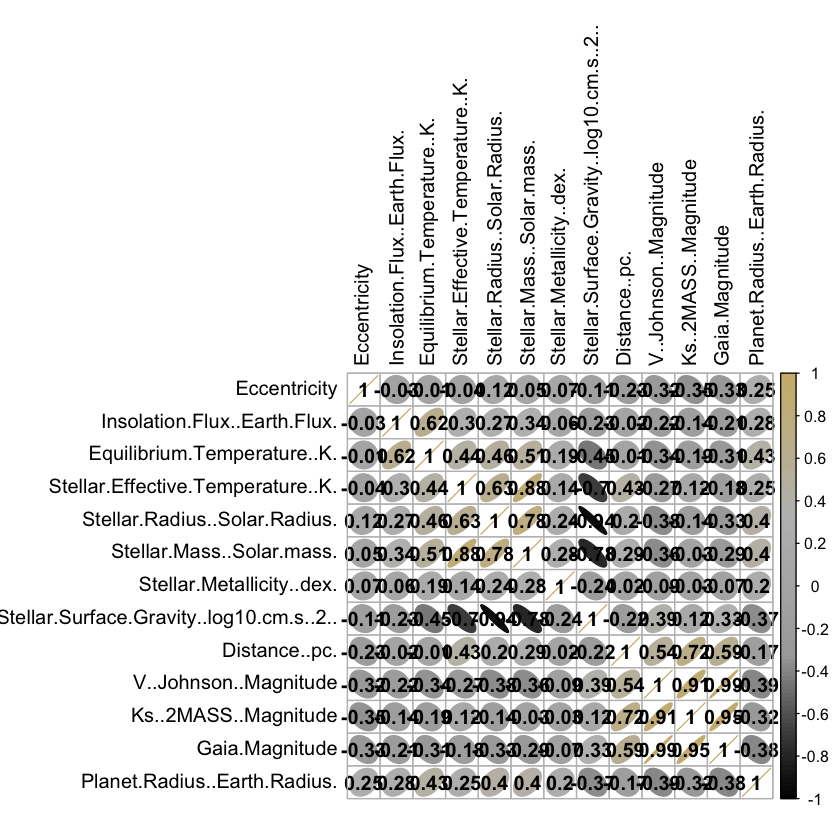

In [347]:

col4 = colorRampPalette(c("black", "darkgrey", "grey","#CFB87C"))
corrplot(cor(un), method = "ellipse", col = col4(100),  addCoef.col = "black", tl.col = "black")


In [348]:
library(corrplot)

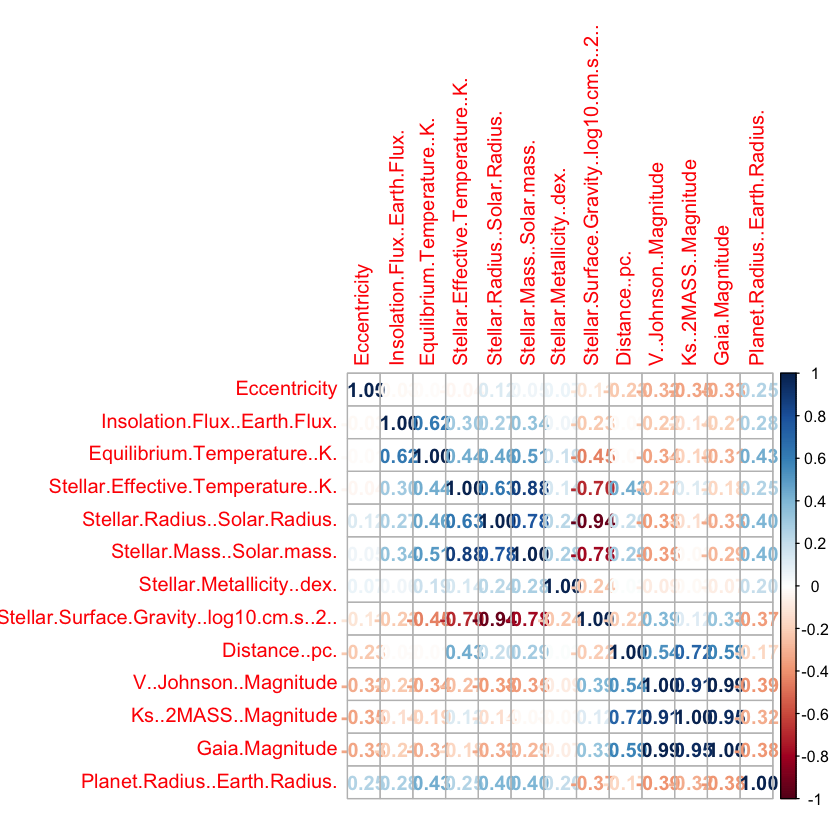

In [349]:
M = cor(un)
corrplot(M, method = 'number') # colorful number

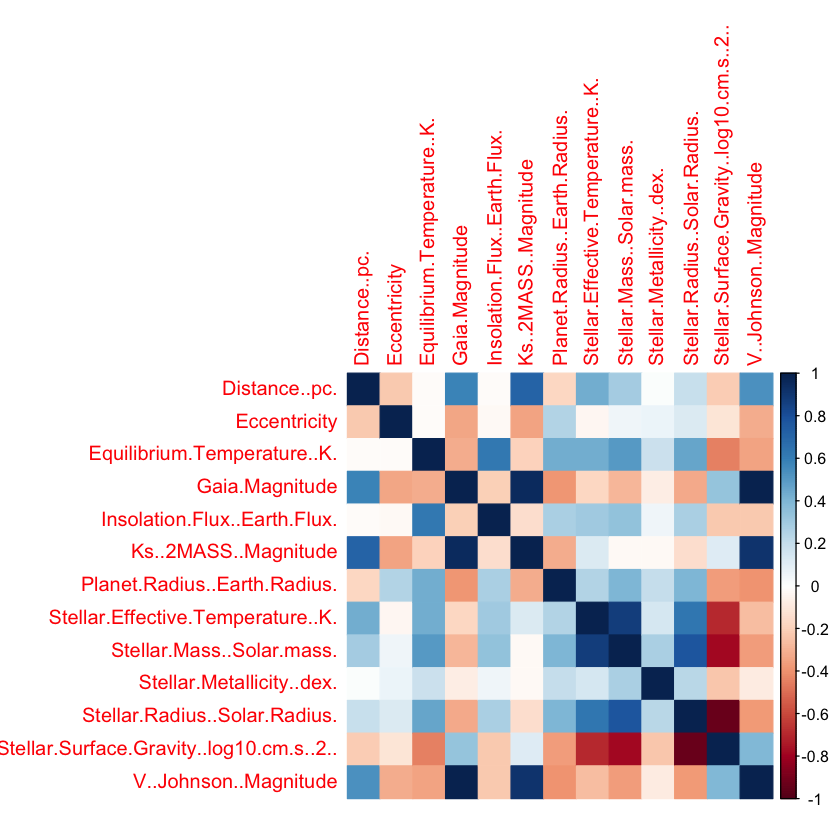

In [350]:
corrplot(M, method = 'color', order = 'alphabet')

In [351]:
library(mgcv)


In [352]:
summary(un)

  Eccentricity     Insolation.Flux..Earth.Flux. Equilibrium.Temperature..K.
 Min.   :0.00000   Min.   :    0.02             Min.   :  96.0             
 1st Qu.:0.00000   1st Qu.:   24.52             1st Qu.: 568.0             
 Median :0.00000   Median :  101.62             Median : 813.0             
 Mean   :0.02513   Mean   :  415.71             Mean   : 902.5             
 3rd Qu.:0.00000   3rd Qu.:  374.10             3rd Qu.:1133.0             
 Max.   :0.92000   Max.   :44900.00             Max.   :4050.0             
 Stellar.Effective.Temperature..K. Stellar.Radius..Solar.Radius.
 Min.   : 2566                     Min.   :0.120                
 1st Qu.: 5131                     1st Qu.:0.790                
 Median : 5631                     Median :0.950                
 Mean   : 5461                     Mean   :1.024                
 3rd Qu.: 5946                     3rd Qu.:1.180                
 Max.   :10170                     Max.   :6.300                
 Stellar.Mass

In [353]:
gam_1 <- gam(Planet.Radius..Earth.Radius. ~ s(Eccentricity) + s(Insolation.Flux..Earth.Flux.) + s(Equilibrium.Temperature..K.) + s(Stellar.Effective.Temperature..K.) + s(Stellar.Radius..Solar.Radius.) +s(Stellar.Mass..Solar.mass.) + s(Stellar.Metallicity..dex.) + s(Stellar.Surface.Gravity..log10.cm.s..2..)+ s(Distance..pc.) + s(V..Johnson..Magnitude) + s(Ks..2MASS..Magnitude) + s(Gaia.Magnitude), data = un)
summary(gam_1)


Family: gaussian 
Link function: identity 

Formula:
Planet.Radius..Earth.Radius. ~ s(Eccentricity) + s(Insolation.Flux..Earth.Flux.) + 
    s(Equilibrium.Temperature..K.) + s(Stellar.Effective.Temperature..K.) + 
    s(Stellar.Radius..Solar.Radius.) + s(Stellar.Mass..Solar.mass.) + 
    s(Stellar.Metallicity..dex.) + s(Stellar.Surface.Gravity..log10.cm.s..2..) + 
    s(Distance..pc.) + s(V..Johnson..Magnitude) + s(Ks..2MASS..Magnitude) + 
    s(Gaia.Magnitude)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.0759     0.0588   69.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                                              edf Ref.df      F  p-value    
s(Eccentricity)                             7.644  8.510 22.531  < 2e-16 ***
s(Insolation.Flux..Earth.Flux.)             5.897  6.858 22.279  < 2e-16 ***
s(Equilibrium.Temperature..K.)              6.942  7.907 45.

In [354]:
gam_2 <- gam(Planet.Radius..Earth.Radius. ~   s(Eccentricity) + s(Insolation.Flux..Earth.Flux.) + s(Equilibrium.Temperature..K.) + s(Stellar.Radius..Solar.Radius.) +s(Stellar.Mass..Solar.mass.) + s(Stellar.Metallicity..dex.) + s(Distance..pc.) + s(V..Johnson..Magnitude) + s(Ks..2MASS..Magnitude) + s(Gaia.Magnitude), data = un)
summary(gam_2)


Family: gaussian 
Link function: identity 

Formula:
Planet.Radius..Earth.Radius. ~ s(Eccentricity) + s(Insolation.Flux..Earth.Flux.) + 
    s(Equilibrium.Temperature..K.) + s(Stellar.Radius..Solar.Radius.) + 
    s(Stellar.Mass..Solar.mass.) + s(Stellar.Metallicity..dex.) + 
    s(Distance..pc.) + s(V..Johnson..Magnitude) + s(Ks..2MASS..Magnitude) + 
    s(Gaia.Magnitude)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.0759     0.0588   69.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                                   edf Ref.df      F  p-value    
s(Eccentricity)                  7.679  8.532 22.621  < 2e-16 ***
s(Insolation.Flux..Earth.Flux.)  5.832  6.790 22.415  < 2e-16 ***
s(Equilibrium.Temperature..K.)   6.927  7.895 45.491  < 2e-16 ***
s(Stellar.Radius..Solar.Radius.) 5.386  6.499  2.057 0.046155 *  
s(Stellar.Mass..Solar.mass.)     8.398  8.854 10.62

In [355]:
gam_3 <- gam(Planet.Radius..Earth.Radius. ~  s(Eccentricity) + s(Insolation.Flux..Earth.Flux.) + s(Equilibrium.Temperature..K.) + s(Stellar.Radius..Solar.Radius.) +s(Stellar.Mass..Solar.mass.) + s(Stellar.Metallicity..dex.) + s(Distance..pc.) + s(V..Johnson..Magnitude) + s(Ks..2MASS..Magnitude) , data = un)
summary(gam_3)


Family: gaussian 
Link function: identity 

Formula:
Planet.Radius..Earth.Radius. ~ s(Eccentricity) + s(Insolation.Flux..Earth.Flux.) + 
    s(Equilibrium.Temperature..K.) + s(Stellar.Radius..Solar.Radius.) + 
    s(Stellar.Mass..Solar.mass.) + s(Stellar.Metallicity..dex.) + 
    s(Distance..pc.) + s(V..Johnson..Magnitude) + s(Ks..2MASS..Magnitude)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.07593    0.05893   69.16   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                                   edf Ref.df      F  p-value    
s(Eccentricity)                  7.571  8.463 22.276  < 2e-16 ***
s(Insolation.Flux..Earth.Flux.)  5.487  6.434 22.965  < 2e-16 ***
s(Equilibrium.Temperature..K.)   6.946  7.906 45.280  < 2e-16 ***
s(Stellar.Radius..Solar.Radius.) 5.491  6.602  2.776  0.00953 ** 
s(Stellar.Mass..Solar.mass.)     8.483  8.887 12.217  < 2e-16 ***
s(Stellar.

In [356]:
AIC(gam_1)
AIC(gam_2)
AIC(gam_3)

[1] 13708.36

[1] 13705.17

[1] 13713.9

In [357]:
BIC(gam_1)
BIC(gam_2)
BIC(gam_3)

[1] 14114.89

[1] 14094.17

[1] 14083.65

In [358]:

library(leaps)
library(MASS)



In [359]:
reg1 = regsubsets(Planet.Radius..Earth.Radius. ~ Eccentricity  + Equilibrium.Temperature..K. + Stellar.Effective.Temperature..K.+  Stellar.Radius..Solar.Radius. + Stellar.Mass..Solar.mass. + Distance..pc. + V..Johnson..Magnitude  , data = un)
rs = summary(reg1)
rs$which

,(Intercept),Eccentricity,Equilibrium.Temperature..K.,Stellar.Effective.Temperature..K.,Stellar.Radius..Solar.Radius.,Stellar.Mass..Solar.mass.,Distance..pc.,V..Johnson..Magnitude
1,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE
3,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE
4,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE
5,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE
6,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE
7,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


In [360]:
n = dim(un)[1]; 

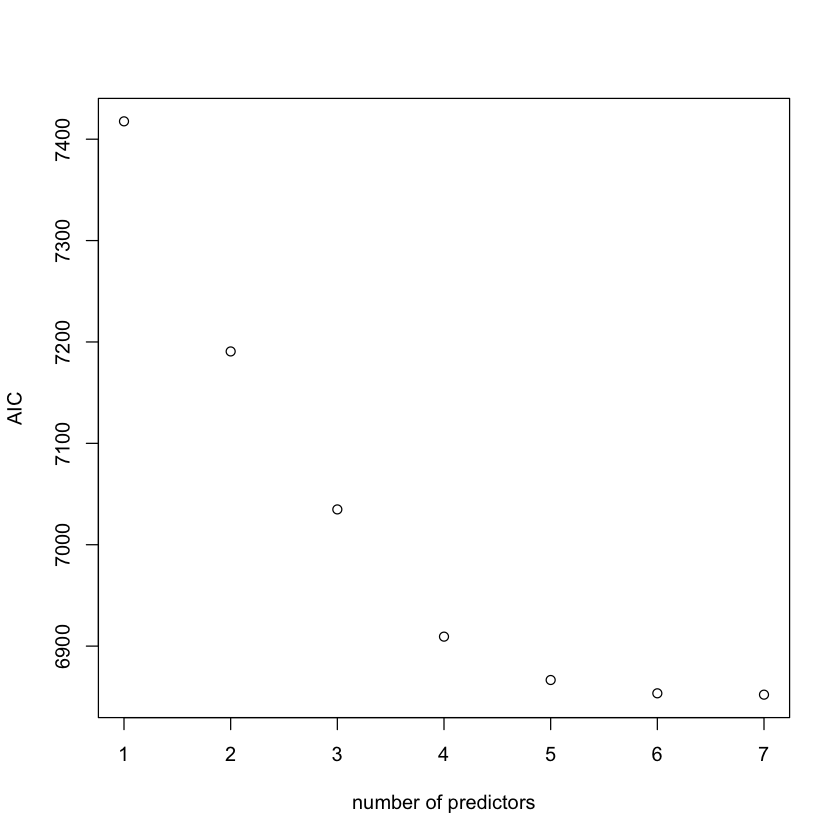

In [361]:
#YOUR CODE HERE
AIC = 2*(1:7) + n*log(rs$rss/n)
plot(AIC ~ I(1:7), xlab = "number of predictors", ylab = "AIC")

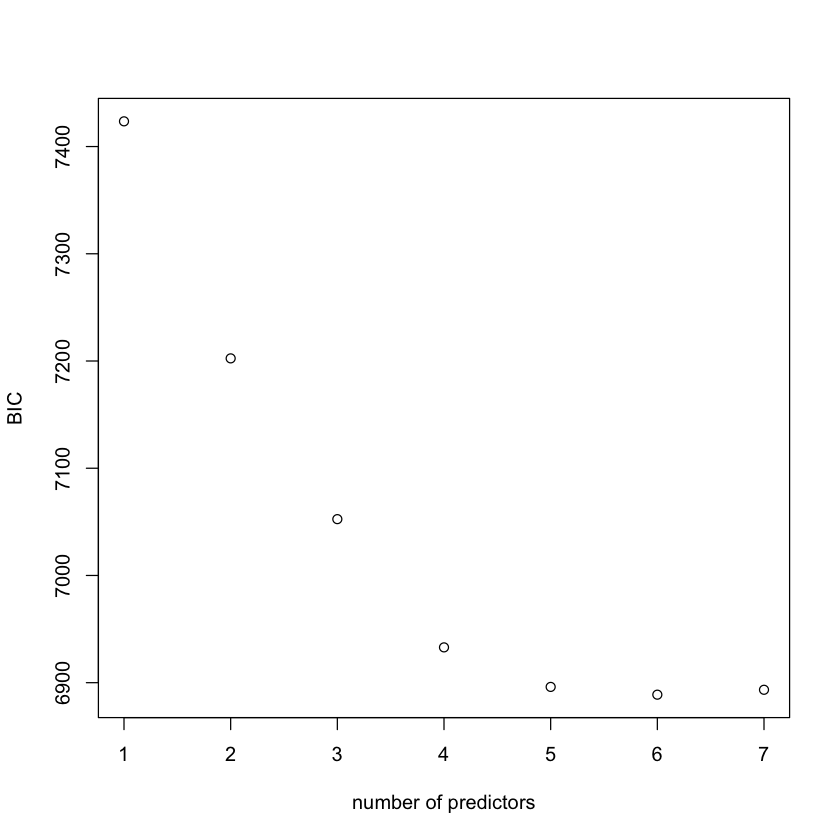

In [362]:
BIC = log(n)*(1:7) + n*log(rs$rss/n) 
plot(BIC ~ I(1:7), xlab = "number of predictors", ylab = "BIC")

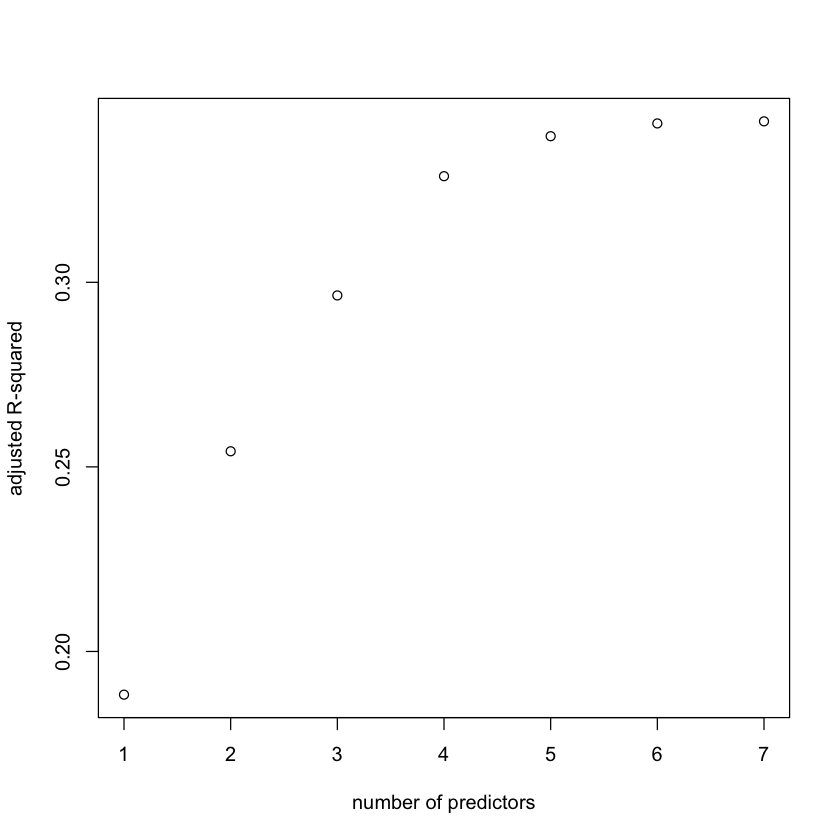

In [363]:
#YOUR CODE HERE
plot(1:7, rs$adjr2, xlab = "number of predictors", ylab = "adjusted R-squared")

In [364]:
gam_2 <- gam(Planet.Radius..Earth.Radius. ~   s(Eccentricity) + s(Insolation.Flux..Earth.Flux.) + s(Equilibrium.Temperature..K.) + s(Stellar.Radius..Solar.Radius.) +s(Stellar.Mass..Solar.mass.) + s(Stellar.Metallicity..dex.) + s(Distance..pc.) + s(V..Johnson..Magnitude) + s(Ks..2MASS..Magnitude) + s(Gaia.Magnitude), data = un)
summary(gam_2)


Family: gaussian 
Link function: identity 

Formula:
Planet.Radius..Earth.Radius. ~ s(Eccentricity) + s(Insolation.Flux..Earth.Flux.) + 
    s(Equilibrium.Temperature..K.) + s(Stellar.Radius..Solar.Radius.) + 
    s(Stellar.Mass..Solar.mass.) + s(Stellar.Metallicity..dex.) + 
    s(Distance..pc.) + s(V..Johnson..Magnitude) + s(Ks..2MASS..Magnitude) + 
    s(Gaia.Magnitude)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.0759     0.0588   69.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                                   edf Ref.df      F  p-value    
s(Eccentricity)                  7.679  8.532 22.621  < 2e-16 ***
s(Insolation.Flux..Earth.Flux.)  5.832  6.790 22.415  < 2e-16 ***
s(Equilibrium.Temperature..K.)   6.927  7.895 45.491  < 2e-16 ***
s(Stellar.Radius..Solar.Radius.) 5.386  6.499  2.057 0.046155 *  
s(Stellar.Mass..Solar.mass.)     8.398  8.854 10.62

Warning message in plot.window(...):
“"method" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"method" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"method" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"method" is not a graphical parameter”
Warning message in box(...):
“"method" is not a graphical parameter”
Warning message in title(...):
“"method" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"method" is not a graphical parameter”
Warning message in plot.window(...):
“"method" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"method" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"method" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"method" is not a graphical parameter”
W


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 12 iterations.
The RMS GCV score gradient at convergence was 8.432082e-07 .
The Hessian was positive definite.
Model rank =  82 / 82 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                                       k'  edf k-index p-value    
s(Eccentricity)                      9.00 7.26    0.98   0.125    
s(Insolation.Flux..Earth.Flux.)      9.00 5.29    0.99   0.360    
s(Equilibrium.Temperature..K.)       9.00 7.06    0.99   0.345    
s(Stellar.Effective.Temperature..K.) 9.00 1.28    0.95   0.005 ** 
s(Stellar.Radius..Solar.Radius.)     9.00 4.93    1.00   0.525    
s(Stellar.Metallicity..dex.)         9.00 5.02    0.97   0.105    
s(Stellar.Mass..Solar.mass.)         9.00 8.40    1.01   0.720    
s(Distance..pc.)                     9.00 8.71    0.92  <2e-16 ***
s(V..Johnson..Magnitude)             9.00 6.41    0.93 

Warning message in plot.window(...):
“"method" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"method" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"method" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"method" is not a graphical parameter”
Warning message in box(...):
“"method" is not a graphical parameter”
Warning message in title(...):
“"method" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"method" is not a graphical parameter”
Warning message in plot.window(...):
“"method" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"method" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"method" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"method" is not a graphical parameter”
W

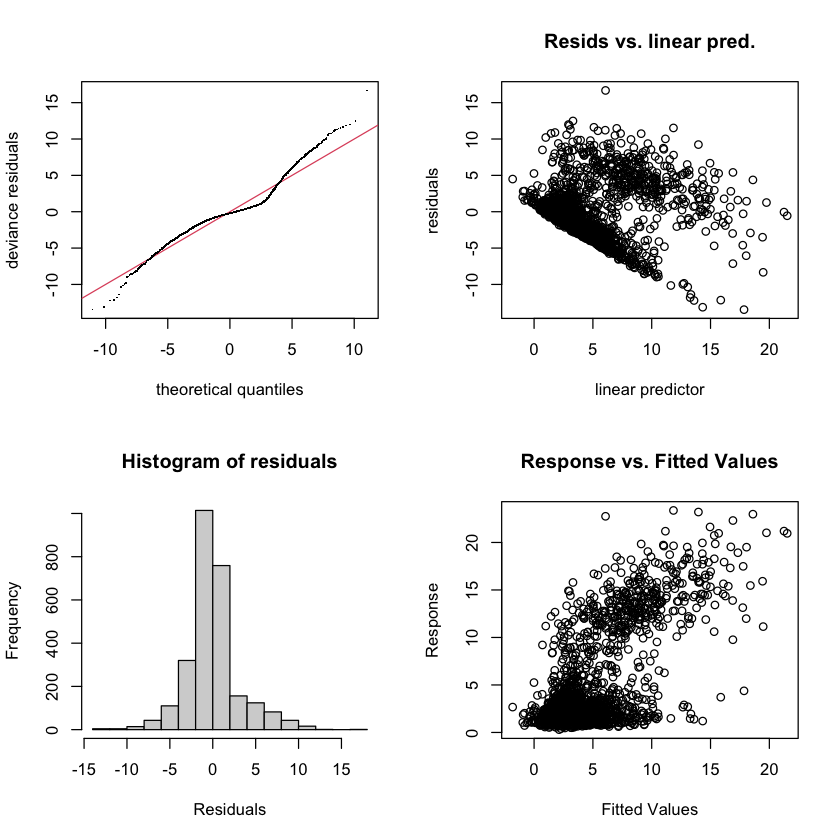


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 12 iterations.
The RMS GCV score gradient at convergence was 8.432082e-07 .
The Hessian was positive definite.
Model rank =  82 / 82 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                                       k'  edf k-index p-value    
s(Eccentricity)                      9.00 7.26    0.98    0.17    
s(Insolation.Flux..Earth.Flux.)      9.00 5.29    0.99    0.30    
s(Equilibrium.Temperature..K.)       9.00 7.06    0.99    0.45    
s(Stellar.Effective.Temperature..K.) 9.00 1.28    0.95  <2e-16 ***
s(Stellar.Radius..Solar.Radius.)     9.00 4.93    1.00    0.54    
s(Stellar.Metallicity..dex.)         9.00 5.02    0.97    0.12    
s(Stellar.Mass..Solar.mass.)         9.00 8.40    1.01    0.78    
s(Distance..pc.)                     9.00 8.71    0.92  <2e-16 ***
s(V..Johnson..Magnitude)             9.00 6.41    0.93 

ERROR: Error in gam1[c(which.min(aic)), ]: incorrect number of dimensions


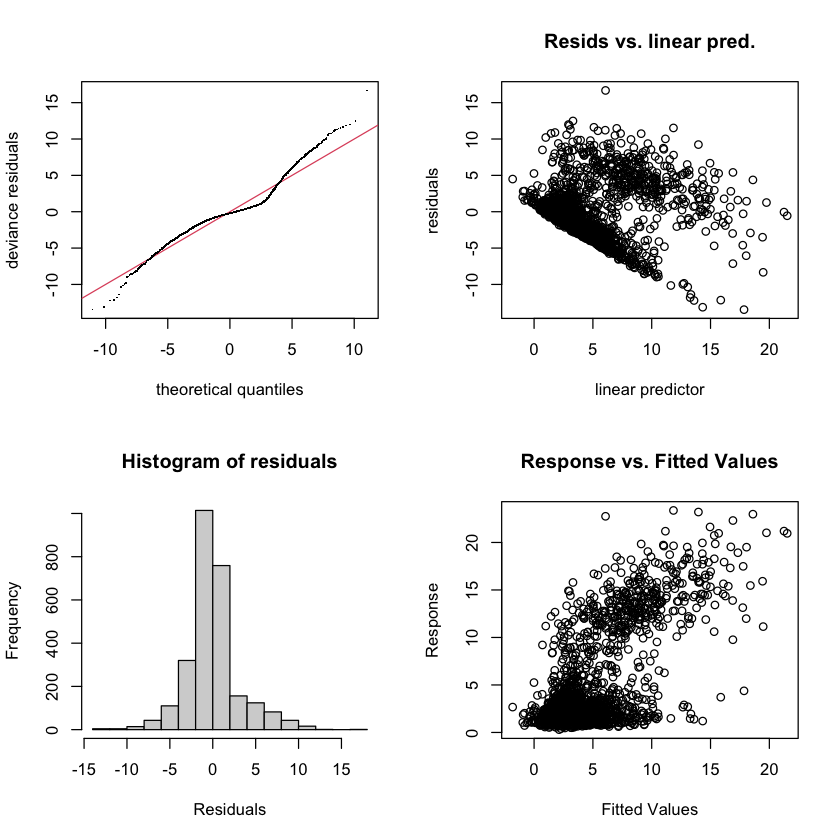

In [365]:
gam1 <- gam(Planet.Radius..Earth.Radius. ~ s(Eccentricity) + s(Insolation.Flux..Earth.Flux.) + s(Equilibrium.Temperature..K.) + 
              s(Stellar.Effective.Temperature..K.) + s(Stellar.Radius..Solar.Radius.) + s(Stellar.Metallicity..dex.) +
              s(Stellar.Mass..Solar.mass.) + s(Distance..pc.) + s(V..Johnson..Magnitude),
            data = un)

# Use AIC or BIC to select a subset of predictors
aic <- gam.check(gam1, method = "AIC")$extract.penalty
bic <- gam.check(gam1, method = "BIC")$extract.penalty

# Extract the model with the minimum AIC or BIC value
gam_min_aic <- gam1[c(which.min(aic)), ]
gam_min_bic <- gam1[c(which.min(bic)), ]

# Get a summary of the selected model
summary(gam_min_aic)
summary(gam_min_bic)

In [ ]:
gam1 <- gam(Planet.Radius..Earth.Radius. ~ s(Eccentricity) + s(Equilibrium.Temperature..K.) + 
              s(Stellar.Effective.Temperature..K.) + s(Stellar.Radius..Solar.Radius.) + 
              s(Stellar.Mass..Solar.mass.) + s(Distance..pc.) + s(V..Johnson..Magnitude),
            data = un)
summary(gam1)

In [ ]:
library(ggplot2)

In [ ]:

ggplot(un, aes(x = Eccentricity)) +
  geom_density(fill = "#69b3a2", alpha = 0.8) +
  ggtitle("Distribution of Eccentricity") +
  xlab("Eccentricity")

ggplot(un, aes(x = Equilibrium.Temperature..K.)) +
  geom_density(fill = "#69b3a2", alpha = 0.8) +
  ggtitle("Distribution of Equilibrium Temperature") +
  xlab("Equilibrium Temperature (K)")

ggplot(un, aes(x = Stellar.Mass..Solar.mass.)) +
  geom_density(fill = "#69b3a2", alpha = 0.8) +
  ggtitle("Distribution of Stellar Mass") +
  xlab("Stellar Mass (Solar Mass)")

ggplot(un, aes(x = Stellar.Metallicity..dex.)) +
  geom_density(fill = "#69b3a2", alpha = 0.8) +
  ggtitle("Distribution of Stellar Metallicity") +
  xlab("Stellar Metallicity (dex)")

ggplot(un, aes(x = Distance..pc.)) +
  geom_density(fill = "#69b3a2", alpha = 0.8) +
  ggtitle("Distribution of Distance") +
  xlab("Distance (pc)")

In [ ]:
#FIX
names(un)

# Apply a log transformation to the 'Distance..pc.' variable
a <- sqrt(un$Distance..pc.)

# Plot the original and transformed data
par(mfrow = c(1, 2))
hist(un$Distance..pc.)
hist(a)

In [ ]:
#Fix

In [ ]:
names(un)

# Apply a log transformation to the 'Distance..pc.' variable
b <- log(un$Stellar.Mass..Solar.mass.)

# Plot the original and transformed data
par(mfrow = c(1, 2))
hist(un$Stellar.Mass..Solar.mass.)
hist(b)

#fix log
names(un)

# Apply a log transformation to the 'Distance..pc.' variable
c <- exp(un$Eccentricity)

# Plot the original and transformed data
par(mfrow = c(1, 2))
hist(un$Eccentricity)
hist(c)

In [ ]:

names(un)


d <- log(un$Equilibrium.Temperature..K.)

# Plot the original and transformed data
par(mfrow = c(1, 2))
hist(un$Equilibrium.Temperature..K.)
hist(d)

In [ ]:
new_df <- data.frame(a, b, d)

In [ ]:
new_df

In [ ]:
gam_n <- gam(un$Planet.Radius..Earth.Radius. ~ s(a) + s(b) + s(un$Eccentricity) + s(un$Stellar.Metallicity..dex.) + s(d))
summary(gam_n)

In [ ]:
gam_22 <- gam(un$Planet.Radius..Earth.Radius. ~ s(Eccentricity) + s(Insolation.Flux..Earth.Flux.) + s(d) + s(Stellar.Radius..Solar.Radius.) +s(b) + s(Stellar.Metallicity..dex.)+ s(a) + s(V..Johnson..Magnitude) + s(Ks..2MASS..Magnitude) , data = un)
summary(gam_22)

In [ ]:
plot(gam_2)

In [ ]:
#YOUR CODE HERE
AIC(gam_2)
BIC(gam_22)
AIC(gam_2)
BIC(gam_22)

In [ ]:
gam2 <- gam(Planet.Radius..Earth.Radius. ~ s(Eccentricity) + s(Equilibrium.Temperature..K.) + s(Stellar.Mass..Solar.mass.) + s(Stellar.Metallicity..dex.) + s(Distance..pc.), data = un)
summary(gam2)

In [ ]:
library(car)

In [ ]:
vif(gam_2)

In [ ]:
vif(lm_2)

In [ ]:
print(gam_2)

In [ ]:
gam_2_pred <- predict(gam_2)
gam_2_rmse <- sqrt(mean((un$Planet.Radius..Earth.Radius. - gam_2_pred)^2))
print(paste0("Linear model RMSE: ", gam_2_rmse))

In [ ]:
AIC(lm_2)

In [ ]:
AIC(lm_1)

In [ ]:
print(lm_2)

In [366]:
glm_2 <- glm(Planet.Radius..Earth.Radius. ~ s(Eccentricity) + s(Equilibrium.Temperature..K.) + s(Stellar.Mass..Solar.mass.) + s(Stellar.Metallicity..dex.) + s(Distance..pc.), data = un, family = gaussian(link = "identity"))
summary(glm_2)

ERROR: Error in model.frame.default(formula = Planet.Radius..Earth.Radius. ~ : invalid type (list) for variable 's(Eccentricity)'


In [367]:
library(mgcv)
glm_2 <- gam(Planet.Radius..Earth.Radius. ~ s(Eccentricity) + s(Equilibrium.Temperature..K.) + s(Stellar.Mass..Solar.mass.) + s(Stellar.Metallicity..dex.) + s(Distance..pc.), data = un, family=gaussian(link=""))
summary(glm_2)

ERROR: Error in make.link(link): ‘’ link not recognised


In [368]:
library(mgcv)
glm_2 <- gam(Planet.Radius..Earth.Radius. ~  Eccentricity +Equilibrium.Temperature..K. + Stellar.Mass..Solar.mass. + Stellar.Metallicity..dex. + Distance..pc., data = un, family=gaussian(link="identity"))
summary(glm_2)


Family: gaussian 
Link function: identity 

Formula:
Planet.Radius..Earth.Radius. ~ Eccentricity + Equilibrium.Temperature..K. + 
    Stellar.Mass..Solar.mass. + Stellar.Metallicity..dex. + Distance..pc.

Parametric coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -2.2754587  0.2841154  -8.009 1.71e-15 ***
Eccentricity                 9.7833590  0.8675403  11.277  < 2e-16 ***
Equilibrium.Temperature..K.  0.0026648  0.0001852  14.385  < 2e-16 ***
Stellar.Mass..Solar.mass.    5.2909566  0.3561423  14.856  < 2e-16 ***
Stellar.Metallicity..dex.    1.6402780  0.4471397   3.668 0.000249 ***
Distance..pc.               -0.0020009  0.0001637 -12.223  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


R-sq.(adj) =  0.332   Deviance explained = 33.3%
GCV = 12.989  Scale est. = 12.96     n = 2691

# ridge regression (gam) parametric non parametric 

# causality

# MSPE

# gamma

       Length Class  Mode   
coef   606    -none- numeric
scales   6    -none- numeric
Inter    1    -none- numeric
lambda 101    -none- numeric
ym       1    -none- numeric
xm       6    -none- numeric
GCV    101    -none- numeric
kHKB     1    -none- numeric
kLW      1    -none- numeric

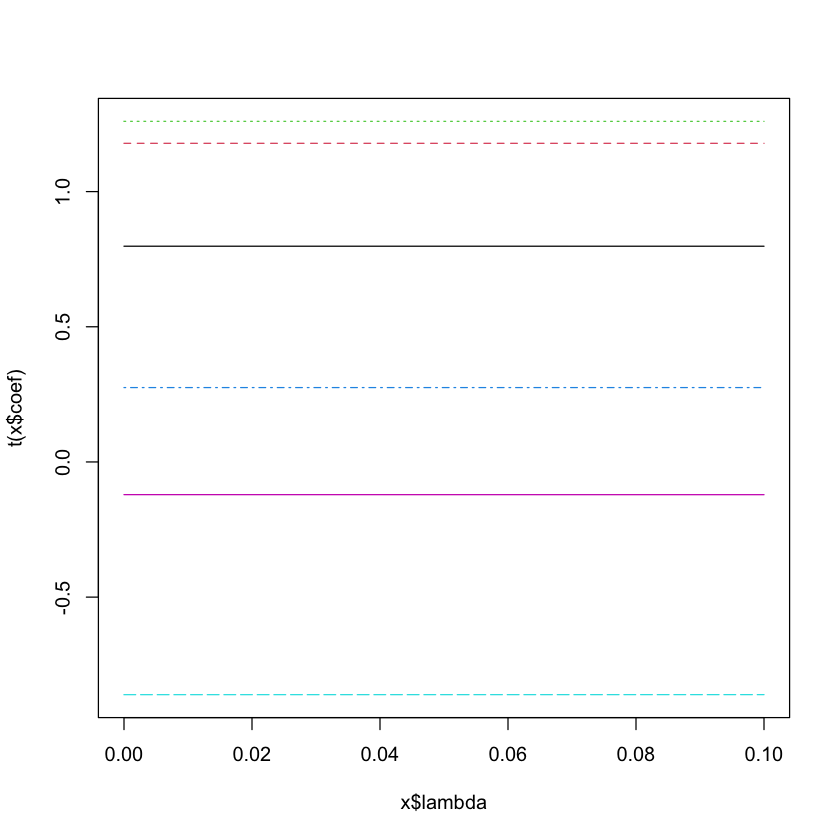

In [369]:
library(MASS)
# Fit ridge regression with lambda sequence
ridge.fit <- lm.ridge(Planet.Radius..Earth.Radius. ~ Eccentricity + Equilibrium.Temperature..K. + Stellar.Mass..Solar.mass. + Stellar.Metallicity..dex. + Distance..pc. + V..Johnson..Magnitude  , data = un, lambda = seq(0, 0.1, 0.001))
# Plot coefficients as a function of lambda
# Plot the coefficients as a function of lambda
plot(ridge.fit)
summary(ridge.fit)


In [370]:
install.packages('glmnet')


The downloaded binary packages are in
	/var/folders/qq/zyngqjz97h3bk2s3vzc_wb5h0000gn/T//RtmpWwp3rO/downloaded_packages


In [371]:

library(glmnet)
X <- model.matrix(Planet.Radius..Earth.Radius. ~ ., data = un)[,-1]
y <- un$Planet.Radius..Earth.Radius.
cv.ridge <- suppressWarnings(cv.glmnet(X, y, alpha = 0, lambda = seq(0, 0.1, 0.001), 
                      keep = TRUE, intercept = FALSE))
gcv.min <- cv.ridge$lambda.min
#gcv.min
cat("GCV value of 𝜆:", gcv.min, "\n" )

GCV value of 𝜆: 0.02 


In [372]:
X

,Eccentricity,Insolation.Flux..Earth.Flux.,Equilibrium.Temperature..K.,Stellar.Effective.Temperature..K.,Stellar.Radius..Solar.Radius.,Stellar.Mass..Solar.mass.,Stellar.Metallicity..dex.,Stellar.Surface.Gravity..log10.cm.s..2..,Distance..pc.,V..Johnson..Magnitude,Ks..2MASS..Magnitude,Gaia.Magnitude
103,0.000,1519.96,1700,6200.00,1.57,1.27,0.010,4.15,211.5530,10.358,8.953,10.14890
1422,0.000,197.81,956,4786.00,0.70,0.69,-0.200,4.58,560.4450,15.484,12.985,15.25400
1088,0.000,1513.46,1374,5706.00,0.93,0.96,-0.070,4.49,814.1250,14.357,12.621,14.19630
177,0.487,0.06,145,5957.00,1.21,1.18,0.340,4.15,87.6437,8.340,6.870,8.18736
1543,0.000,499.07,1205,5591.00,0.86,0.98,0.070,4.56,818.4820,14.851,13.109,14.79990
543,0.000,2399.97,2199,6104.00,1.17,1.11,0.000,4.35,1090.7000,14.863,13.234,14.62760
945,0.000,8.93,441,5664.00,0.92,0.95,-0.040,4.49,1660.4800,15.945,14.237,15.77090
2065,0.000,154.65,946,6620.00,1.85,1.65,0.060,4.06,808.7620,12.329,11.583,12.30310
2174,0.000,43.26,651,5178.00,0.77,0.82,0.160,4.56,882.4620,15.949,13.605,15.61720
2805,0.000,5.75,390,5773.00,0.99,0.99,0.020,4.45,983.5020,15.167,13.403,15.06380


In [373]:
#YOUR CODE HERE
ridge.fit <- glmnet(X, y, alpha = 0, lambda = gcv.min, intercept = FALSE)
print(coef(ridge.fit))

13 x 1 sparse Matrix of class "dgCMatrix"
                                                    s0
(Intercept)                               .           
Eccentricity                              8.300496e+00
Insolation.Flux..Earth.Flux.              7.792032e-06
Equilibrium.Temperature..K.               2.539661e-03
Stellar.Effective.Temperature..K.        -7.171510e-04
Stellar.Radius..Solar.Radius.             9.607107e-01
Stellar.Mass..Solar.mass.                 6.722968e+00
Stellar.Metallicity..dex.                 1.216775e+00
Stellar.Surface.Gravity..log10.cm.s..2..  3.378879e-02
Distance..pc.                            -1.178658e-03
V..Johnson..Magnitude                     2.515939e-01
Ks..2MASS..Magnitude                     -6.726214e-01
Gaia.Magnitude                            2.360269e-01


In [374]:
summary(ridge.fit)

          Length Class     Mode   
a0         1     -none-    numeric
beta      12     dgCMatrix S4     
df         1     -none-    numeric
dim        2     -none-    numeric
lambda     1     -none-    numeric
dev.ratio  1     -none-    numeric
nulldev    1     -none-    numeric
npasses    1     -none-    numeric
jerr       1     -none-    numeric
offset     1     -none-    logical
call       6     -none-    call   
nobs       1     -none-    numeric

In [375]:
ridge_model <- glmnet(X, y, alpha = 0, lambda = 0, intercept = FALSE)
summary(ridge_model)

          Length Class     Mode   
a0         1     -none-    numeric
beta      12     dgCMatrix S4     
df         1     -none-    numeric
dim        2     -none-    numeric
lambda     1     -none-    numeric
dev.ratio  1     -none-    numeric
nulldev    1     -none-    numeric
npasses    1     -none-    numeric
jerr       1     -none-    numeric
offset     1     -none-    logical
call       6     -none-    call   
nobs       1     -none-    numeric

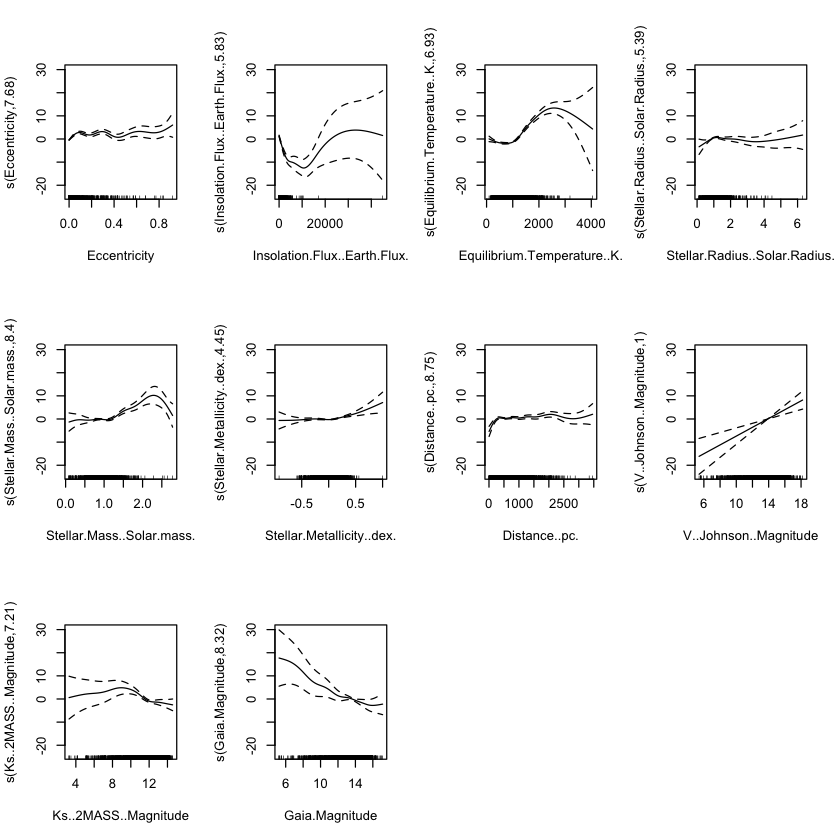

In [376]:
plot(gam_2, pages = 1)

In [377]:
summary(gam_2)


Family: gaussian 
Link function: identity 

Formula:
Planet.Radius..Earth.Radius. ~ s(Eccentricity) + s(Insolation.Flux..Earth.Flux.) + 
    s(Equilibrium.Temperature..K.) + s(Stellar.Radius..Solar.Radius.) + 
    s(Stellar.Mass..Solar.mass.) + s(Stellar.Metallicity..dex.) + 
    s(Distance..pc.) + s(V..Johnson..Magnitude) + s(Ks..2MASS..Magnitude) + 
    s(Gaia.Magnitude)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.0759     0.0588   69.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                                   edf Ref.df      F  p-value    
s(Eccentricity)                  7.679  8.532 22.621  < 2e-16 ***
s(Insolation.Flux..Earth.Flux.)  5.832  6.790 22.415  < 2e-16 ***
s(Equilibrium.Temperature..K.)   6.927  7.895 45.491  < 2e-16 ***
s(Stellar.Radius..Solar.Radius.) 5.386  6.499  2.057 0.046155 *  
s(Stellar.Mass..Solar.mass.)     8.398  8.854 10.62

In [382]:
sp <- gam(Planet.Radius..Earth.Radius. ~   s(Eccentricity) + s(Insolation.Flux..Earth.Flux.) + s(Equilibrium.Temperature..K.) + Stellar.Radius..Solar.Radius. +s(Stellar.Mass..Solar.mass.) + s(Stellar.Metallicity..dex.) + s(Distance..pc.) + V..Johnson..Magnitude + s(Ks..2MASS..Magnitude) + Gaia.Magnitude, data = un)
summary(sp)



Family: gaussian 
Link function: identity 

Formula:
Planet.Radius..Earth.Radius. ~ s(Eccentricity) + s(Insolation.Flux..Earth.Flux.) + 
    s(Equilibrium.Temperature..K.) + Stellar.Radius..Solar.Radius. + 
    s(Stellar.Mass..Solar.mass.) + s(Stellar.Metallicity..dex.) + 
    s(Distance..pc.) + V..Johnson..Magnitude + s(Ks..2MASS..Magnitude) + 
    Gaia.Magnitude

Parametric coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     3.6301     4.5940   0.790 0.429490    
Stellar.Radius..Solar.Radius.   0.1134     0.3006   0.377 0.706014    
V..Johnson..Magnitude           1.6448     0.4542   3.621 0.000299 ***
Gaia.Magnitude                 -1.6473     0.6080  -2.709 0.006785 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                                  edf Ref.df      F p-value    
s(Eccentricity)                 7.452  8.384 21.653  <2e-16 ***
s(Insolation.

In [383]:
#YOUR CODE HERE
gam_pred = predict(gam_2, test)
gam_mspe = mean((test$Planet.Radius..Earth.Radius. - gam_pred)^2);
cat ("The MSPE for the additive model from part (a) is", gam_mspe, ".")

semiparametric_pred = predict(sp, test)
semiparametric_mspe = mean((test$Planet.Radius..Earth.Radius. - semiparametric_pred)^2);
cat ("The MSPE for the semiparametric model from part (b) is", semiparametric_mspe, ".")


lm_pred = predict(lm_2, test)
lm_mspe =  mean((test$Planet.Radius..Earth.Radius. - lm_pred)^2);
cat ("The MSPE for the linear regression model is", lm_mspe, ".")

The MSPE for the additive model from part (a) is 10.62948 .The MSPE for the semiparametric model from part (b) is 10.50047 .The MSPE for the linear regression model is 13.47343 .